In [1]:
import os
import sys

# Go to the root of the project experiments directory
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "../"))
os.chdir(PROJECT_ROOT)  # THIS sets the working directory permanently

if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

In [2]:
from utils.report_project_stats import * # Corrected import assuming project root is in sys.path


In [3]:
INTERACTIVE_CHARTS=False

# Best Config Results – QNLI and SST-2
Hyperparameters used are the same as in LoRA-XS paper + current best configuration for Adaptive LoRA-XS.

## QNLI

rank_allocation_weights initialized to random, no alpha scheduler, rank_max is 25, average rank is 20, rank_min is 5. discrete rank on the last epoch. linear_schedule_with_warmup for lr

LoRA-XS with rank 25: 94.34 ± 0.22
Script:
```bash
python scripts/run_glue_adaptive.py --target_task qnli --wandb_disabled False  --seed $SEED \
--lr 2e-3 --cls_lr 6e-4 \
--rank_allocation_lr $rank_allocation_lr --epoch 15  --rank_min 5 --rank_max 25 --rank_average 20 --epochs_rank_discrete 1 \
--lr_scheduler linear_schedule_with_warmup \
--alpha_min 0.5 --alpha_max 3
```

In [ ]:
project = "adalora_qnli"
entity = "mallahova"
starts_with="resultsa_qnli_5_25_0.5_3"
run_max_metrics=get_results(project=project, entity=entity, starts_with=starts_with)
print_stats(run_max_metrics, project)

| Task   |   Rank Min |   Rank Max |   Alpha Min |   Alpha Max |    LR |   Rank Avg | Median ± Std   |
|:-------|-----------:|-----------:|------------:|------------:|------:|-----------:|:---------------|
| qnli   |          5 |         25 |         0.5 |           3 | 0.002 |         20 | 94.03 ± 0.14   |

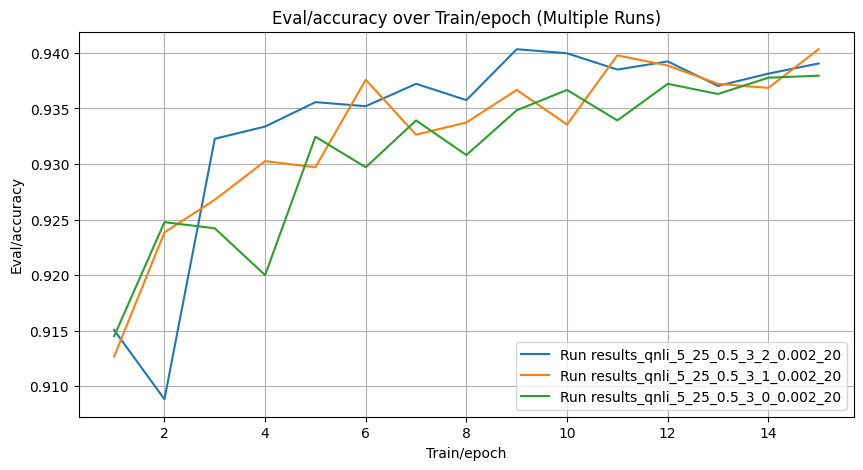

In [6]:
fetch_and_plot_wandb_runs(
    entity="mallahova",
    project="adalora_qnli",
    metric="eval/accuracy",
    x_axis="train/epoch",
    interactive=INTERACTIVE_CHARTS,

)

The results are slightly below the baseline

## SST2

rank_allocation_weights initialized to random, no alpha scheduler, rank_max is 25, average rank is 20, rank_min is 5. discrete rank on the last epoch. linear_schedule_with_warmup for lr

LoRA-XS with rank 25: 96.33 ± 0.15

Script:
```bash
python scripts/run_glue_adaptive.py --target_task sst2 --wandb_disabled False  --seed $SEED \
--lr 2e-3 --cls_lr 1e-3 \
--rank_allocation_lr $rank_allocation_lr --epoch 20  --rank_min 5 --rank_max 25 --rank_average 20 --epochs_rank_discrete 1 \
--lr_scheduler linear_schedule_with_warmup \
--alpha_min 0.5 --alpha_max 3

```

In [9]:
project = "adalora_sst2"
entity = "mallahova"
starts_with="results_sst2_5_25_0.5_3"
run_max_metrics=get_results(project=project, entity=entity, starts_with=starts_with)
print_stats(run_max_metrics, project)

| Task   |   Rank Min |   Rank Max |   Alpha Min |   Alpha Max |    LR |   Rank Avg | Median ± Std   |
|:-------|-----------:|-----------:|------------:|------------:|------:|-----------:|:---------------|
| sst2   |          5 |         25 |         0.5 |           3 | 0.002 |         20 | 95.53 ± 0.08   |

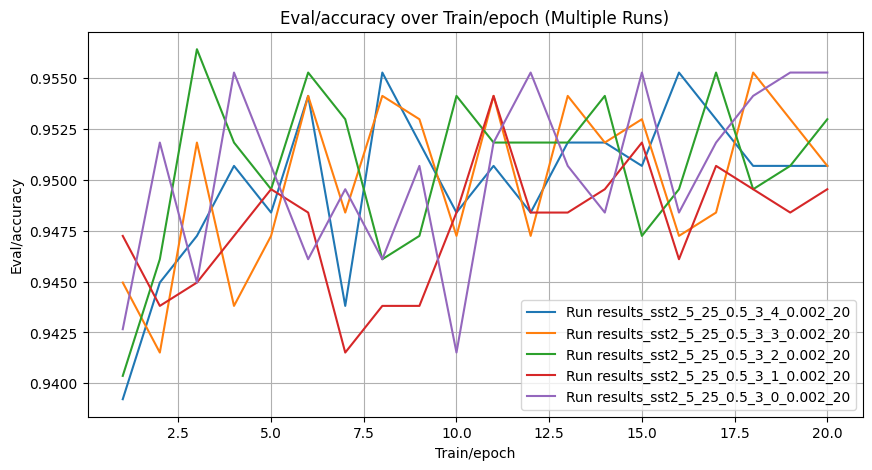

In [10]:
fetch_and_plot_wandb_runs(
    entity="mallahova",
    project="adalora_sst2",
    metric="eval/accuracy",
    x_axis="train/epoch",
    interactive=INTERACTIVE_CHARTS,

)

The results are slightly below the baseline.